In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.geometry import Point
from shapely.geometry.polygon import LinearRing

# ulsan_anch_train_final 배 위치

In [2]:
ulsan_anch_train = pd.read_csv("../기상청공모전/data/ulsan_anch_train_final.csv",encoding='utf-8')
ulsan_anch_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169631 entries, 0 to 169630
Data columns (total 8 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Unnamed: 0                        169631 non-null  int64  
 1   ulsan_anch_train_final.num        169631 non-null  int64  
 2   ulsan_anch_train_final.time       169631 non-null  object 
 3   ulsan_anch_train_final.latitude   169631 non-null  object 
 4   ulsan_anch_train_final.longitude  169631 non-null  object 
 5   ulsan_anch_train_final.sog        169631 non-null  float64
 6   ulsan_anch_train_final.cog        169631 non-null  float64
 7   ulsan_anch_train_final.hdg        169631 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 10.4+ MB


In [3]:
ulsan_anch_train = ulsan_anch_train[['ulsan_anch_train_final.num', 'ulsan_anch_train_final.latitude','ulsan_anch_train_final.longitude']]

ulsan_anch_train = ulsan_anch_train.replace(regex=r'[N]', value='') # latitude 데이터의 'N'삭제
ulsan_anch_train = ulsan_anch_train.replace(regex=r'[E]', value='') # longititude 데이터의 'E'삭제


ulsan_anch_train = ulsan_anch_train.astype(float) # 모든 데이터 타입을 float으로 변경
ulsan_anch_train['ulsan_anch_train_final.num'] = ulsan_anch_train['ulsan_anch_train_final.num'].astype(int) # num 데이터 타입을 int으로 변경
ulsan_anch_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169631 entries, 0 to 169630
Data columns (total 3 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   ulsan_anch_train_final.num        169631 non-null  int32  
 1   ulsan_anch_train_final.latitude   169631 non-null  float64
 2   ulsan_anch_train_final.longitude  169631 non-null  float64
dtypes: float64(2), int32(1)
memory usage: 3.2 MB


In [4]:
ulsan_anch_train.head()

,ulsan_anch_train_final.num,ulsan_anch_train_final.latitude,ulsan_anch_train_final.longitude
0,1,35.461190,129.43873
1,1,35.461160,129.43954
2,1,35.461472,129.43987
3,1,35.461688,129.43979
4,1,35.461708,129.43973


In [5]:
print(ulsan_anch_train['ulsan_anch_train_final.num'].unique())
len(ulsan_anch_train['ulsan_anch_train_final.num'].unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127]


127

In [6]:
def to_dec(coordinate):
    temp = coordinate.split()
    temp = [float(i) for i in temp[1].split("-")]
    
    deg = temp[0]
    min = temp[1]
    sec = temp[2]
    
    temp1 = deg + min/60 + sec/3600
    return round(temp1,6)

In [7]:
def draw_circle(latitude, longitude, radius_km):
    center = Point(latitude,longitude)
    circle = center.buffer(radius_km * 0.008983112)  # 반경을 도 단위로 변환하여 적용 (도 단위당 약 111.32 km)

    return circle

- M1 WAM-01 상기 A, B, P, Q의 4지점을 연결하는 선내의 해면
- M2 WAM-02 상기 B, C, D, S, R의 5지점을 연결하는 선내의 해면
- M3 WAM-03 상기 N, O, P, R, S의 5지점을 연결하는 선내의 해면
- M4 WAM-04 상기 D, E, M, N의 4지점을 연결하는 선내의 해면
- M5 WAM-05 상기 E, F, K, L, M의 5지점을 연결하는 선내의 해면
- M6 WAM-06 상기 F, G, J, K의 4지점을 연결하는 선내의 해면
- M7 WAM-07 상기 G, H, I, J의 4지점을 연결하는 선내의 해면


- A N 35-30-0.8 E 129-23-39.0 
- B N 35-29-44.1 E 129-23-41.2 
- C N 35-29-33.7 E 129-23-42.5 
- D N 35-29-30.7 E 129-23-43.0 
- E N 35-29-17.0 E 129-23-45.3 
- F N 35-29-3.3 E 129-23-47.7 
- G N 35-28-49.6 E 129-23-50.0 
- H N 35-28-35.1 E 129-23-52.5 
- I N 35-28-35.1 E 129-24-9.5 
- J N 35-28-49.6 E 129-24-9.5
- K N 35-29-3.3 E 129-24-9.5 
- L N 35-29-12.8 E 129-24-9.4 
- M N 35-29-17.0 E 129-24-12.0 
- N N 35-29-30.7 E 129-24-20.6 
- O N 35-29-35.4 E 129-24-23.6 
- P N 35-29-44.1 E 129-24-16.6 
- Q N 35-29-54.8 E 129-24-7.9 
- R N 35-29-44.1 E 129-23-59.6 
- S N 35-29-30.7 E 129-24-1.3 


In [8]:
def isin_M1(latitude : float, longitude : float):
    # 점의 좌표 리스트
    points = [
        (to_dec("N 35-30-0.8"), to_dec("E 129-23-39.0")),
        (to_dec("N 35-29-44.1"), to_dec("E 129-23-41.2")),
        (to_dec("N 35-29-44.1"), to_dec("E 129-24-16.6")),
        (to_dec("N 35-29-54.8"), to_dec("E 129-24-7.9"))
    ]

    # 점을 이어서 다각형 영역 생성
    polygon = Polygon(points)
    target_point = Point(latitude,longitude)
    # 특정 점이 영역 내부에 있는지 확인
    is_inside = polygon.contains(target_point)

    # 결과 출력
    return is_inside

In [9]:
def isin_M2(latitude : float, longitude : float):
    # 점의 좌표 리스트
    points = [
        (to_dec("N 35-29-44.1"), to_dec("E 129-23-41.2")),
        (to_dec("N 35-29-33.7"), to_dec("E 129-23-42.5")),
        (to_dec("N 35-29-30.7"), to_dec("E 129-23-43.0")),
        (to_dec("N 35-29-30.7"), to_dec("E 129-24-1.3")),
        (to_dec("N 35-29-44.1"), to_dec("E 129-23-59.6"))
    ]

    # 점을 이어서 다각형 영역 생성
    polygon = Polygon(points)
    target_point = Point(latitude,longitude)
    # 특정 점이 영역 내부에 있는지 확인
    is_inside = polygon.contains(target_point)

    # 결과 출력
    return is_inside

In [10]:
def isin_M3(latitude : float, longitude : float):
    # 점의 좌표 리스트
    points = [
        (to_dec("N 35-29-30.7"), to_dec("E 129-24-20.6")),
        (to_dec("N 35-29-35.4"), to_dec("E 129-24-23.6")),
        (to_dec("N 35-29-44.1"), to_dec("E 129-24-16.6")),
        (to_dec("N 35-29-44.1"), to_dec("E 129-23-59.6")),
        (to_dec("N 35-29-30.7"), to_dec("E 129-24-1.3"))
    ]

    # 점을 이어서 다각형 영역 생성
    polygon = Polygon(points)
    target_point = Point(latitude,longitude)
    # 특정 점이 영역 내부에 있는지 확인
    is_inside = polygon.contains(target_point)

    # 결과 출력
    return is_inside

In [11]:
def isin_M4(latitude : float, longitude : float):
    # 점의 좌표 리스트
    points = [
        (to_dec("N 35-29-30.7"), to_dec("E 129-23-43.0")),
        (to_dec("N 35-29-17.0"), to_dec("E 129-23-45.3")),
        (to_dec("N 35-29-17.0"), to_dec("E 129-24-12.0")),
        (to_dec("N 35-29-30.7"), to_dec("E 129-24-20.6")),
    ]

    # 점을 이어서 다각형 영역 생성
    polygon = Polygon(points)
    target_point = Point(latitude,longitude)
    # 특정 점이 영역 내부에 있는지 확인
    is_inside = polygon.contains(target_point)

    # 결과 출력
    return is_inside

In [12]:
def isin_M5(latitude : float, longitude : float):
    # 점의 좌표 리스트
    points = [
        (to_dec("N 35-29-17.0"), to_dec("E 129-23-45.3")),
        (to_dec("N 35-29-3.3"), to_dec("E 129-23-47.7")),
        (to_dec("N 35-29-3.3"), to_dec("E 129-24-9.5")),
        (to_dec("N 35-29-12.8"), to_dec("E 129-24-9.4")),
        (to_dec("N 35-29-17.0"), to_dec("E 129-24-12.0"))
    ]

    # 점을 이어서 다각형 영역 생성
    polygon = Polygon(points)
    target_point = Point(latitude,longitude)
    # 특정 점이 영역 내부에 있는지 확인
    is_inside = polygon.contains(target_point)

    # 결과 출력
    return is_inside

In [13]:
def isin_M6(latitude : float, longitude : float):
    # 점의 좌표 리스트
    points = [
        (to_dec("N 35-29-3.3"), to_dec("E 129-23-47.7")),
        (to_dec("N 35-28-49.6"), to_dec("E 129-23-50.0")),
        (to_dec("N 35-28-49.6"), to_dec("E 129-24-9.5")),
        (to_dec("N 35-29-3.3"), to_dec("E 129-24-9.5")),
    ]

    # 점을 이어서 다각형 영역 생성
    polygon = Polygon(points)
    target_point = Point(latitude,longitude)
    # 특정 점이 영역 내부에 있는지 확인
    is_inside = polygon.contains(target_point)

    # 결과 출력
    return is_inside

In [14]:
def isin_M7(latitude : float, longitude : float):
    # 점의 좌표 리스트
    points = [
        (to_dec("N 35-28-49.6"), to_dec("E 129-23-50.0")),
        (to_dec("N 35-28-35.1"), to_dec("E 129-23-52.5")),
        (to_dec("N 35-28-35.1"), to_dec("E 129-24-9.5")),
        (to_dec("N 35-28-49.6"), to_dec("E 129-24-9.5")),
    ]

    # 점을 이어서 다각형 영역 생성
    polygon = Polygon(points)
    target_point = Point(latitude,longitude)
    # 특정 점이 영역 내부에 있는지 확인
    is_inside = polygon.contains(target_point)

    # 결과 출력
    return is_inside

In [15]:
def isin_W1(latitude : float, longitude : float):
    circle = draw_circle(to_dec("N 35-27-17.0"), to_dec("E 129-23-23.0"), 0.4)
    target_point = Point(latitude,longitude)
    # 특정 점이 영역 내부에 있는지 확인
    is_inside = circle.contains(target_point)

    # 결과 출력
    return is_inside

In [16]:
def isin_T1(latitude : float, longitude : float):
    circle = draw_circle(to_dec("N 35-30-37.3"), to_dec("E 129-27-17.7"), 0.3)
    target_point = Point(latitude,longitude)
    # 특정 점이 영역 내부에 있는지 확인
    is_inside = circle.contains(target_point)

    # 결과 출력
    return is_inside

In [17]:
def isin_T2(latitude : float, longitude : float):
    circle = draw_circle(to_dec("N 35-30-57.0"), to_dec("E 129-27-17.7"), 0.3)
    target_point = Point(latitude,longitude)
    # 특정 점이 영역 내부에 있는지 확인
    is_inside = circle.contains(target_point)

    # 결과 출력
    return is_inside

In [18]:
def isin_T3(latitude : float, longitude : float):
    circle = draw_circle(to_dec("N 35-31-40.2"), to_dec("E 129-27-34.0"), 0.25)
    target_point = Point(latitude,longitude)
    # 특정 점이 영역 내부에 있는지 확인
    is_inside = circle.contains(target_point)

    # 결과 출력
    return is_inside

In [19]:
for i in ulsan_anch_train['ulsan_anch_train_final.num'].unique():
    temp = ulsan_anch_train[ulsan_anch_train['ulsan_anch_train_final.num'] == i]

    anchorage = []
    
    for j in range(len(temp)):
        lat = temp.iloc[j,1]
        long = temp.iloc[j,2]
        if isin_M1(lat,long):
            anchorage.append('M-1')
        elif isin_M2(lat,long):
            anchorage.append('M-2')
        elif isin_M3(lat,long):
            anchorage.append('M-3')
        elif isin_M4(lat,long):
            anchorage.append('M-4')
        elif isin_M5(lat,long):
            anchorage.append('M-5')
        elif isin_M6(lat,long):
            anchorage.append('M-6')
        elif isin_M7(lat,long):
            anchorage.append('M-7')
        elif isin_W1(lat,long):
            anchorage.append('W-1')
        elif isin_T1(lat,long):
            anchorage.append('T-1')
        elif isin_T2(lat,long):
            anchorage.append('T-2')
        elif isin_T3(lat,long):
            anchorage.append('T-3')
        else:
            anchorage.append('not decided')
    print(f'ship num : {i}, anchorage : {set(anchorage)}')
            

ship num : 1, anchorage : {'W-1'}
ship num : 2, anchorage : {'W-1'}
ship num : 3, anchorage : {'W-1'}
ship num : 4, anchorage : {'W-1'}
ship num : 5, anchorage : {'W-1'}
ship num : 6, anchorage : {'W-1'}
ship num : 7, anchorage : {'W-1'}
ship num : 8, anchorage : {'W-1'}
ship num : 9, anchorage : {'W-1'}
ship num : 10, anchorage : {'W-1'}
ship num : 11, anchorage : {'W-1'}
ship num : 12, anchorage : {'W-1'}
ship num : 13, anchorage : {'W-1'}
ship num : 14, anchorage : {'W-1'}
ship num : 15, anchorage : {'W-1'}
ship num : 16, anchorage : {'W-1'}
ship num : 17, anchorage : {'W-1'}
ship num : 18, anchorage : {'W-1'}
ship num : 19, anchorage : {'W-1'}
ship num : 20, anchorage : {'W-1'}
ship num : 21, anchorage : {'W-1'}
ship num : 22, anchorage : {'W-1'}
ship num : 23, anchorage : {'W-1'}
ship num : 24, anchorage : {'W-1'}
ship num : 25, anchorage : {'W-1'}
ship num : 26, anchorage : {'M-3'}
ship num : 27, anchorage : {'M-5'}
ship num : 28, anchorage : {'M-7'}
ship num : 29, anchorage : {'

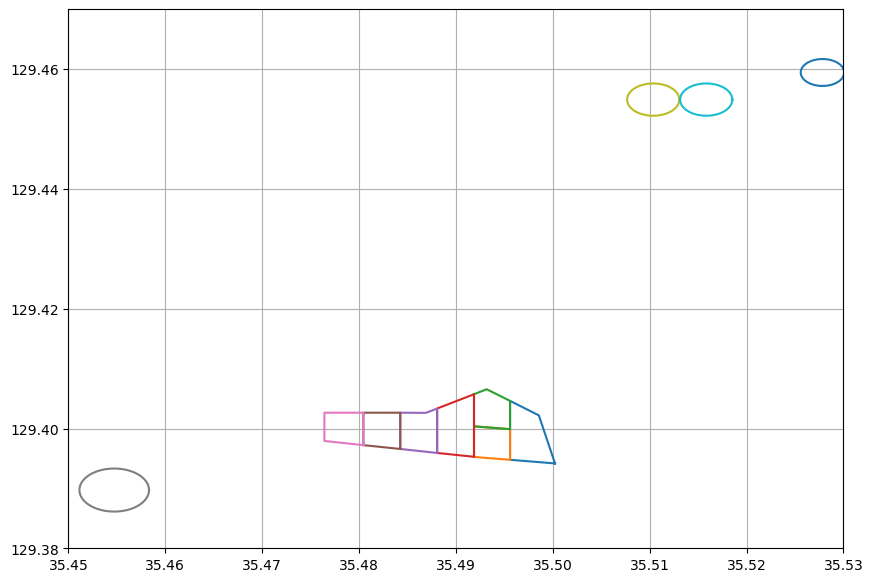

In [50]:
def area_M1():
    # 점의 좌표 리스트
    points = [
        (to_dec("N 35-30-0.8"), to_dec("E 129-23-39.0")),
        (to_dec("N 35-29-44.1"), to_dec("E 129-23-41.2")),
        (to_dec("N 35-29-44.1"), to_dec("E 129-24-16.6")),
        (to_dec("N 35-29-54.8"), to_dec("E 129-24-7.9"))
    ]
    # 점을 이어서 다각형 영역 생성
    polygon = Polygon(points)

    return polygon

def area_M2():
    # 점의 좌표 리스트
    points = [
        (to_dec("N 35-29-44.1"), to_dec("E 129-23-41.2")),
        (to_dec("N 35-29-33.7"), to_dec("E 129-23-42.5")),
        (to_dec("N 35-29-30.7"), to_dec("E 129-23-43.0")),
        (to_dec("N 35-29-30.7"), to_dec("E 129-24-1.3")),
        (to_dec("N 35-29-44.1"), to_dec("E 129-23-59.6"))
    ]
    # 점을 이어서 다각형 영역 생성
    polygon = Polygon(points)

    return polygon

def area_M3():
    # 점의 좌표 리스트
    points = [
        (to_dec("N 35-29-30.7"), to_dec("E 129-24-20.6")),
        (to_dec("N 35-29-35.4"), to_dec("E 129-24-23.6")),
        (to_dec("N 35-29-44.1"), to_dec("E 129-24-16.6")),
        (to_dec("N 35-29-44.1"), to_dec("E 129-23-59.6")),
        (to_dec("N 35-29-30.7"), to_dec("E 129-24-1.3"))
    ]
    # 점을 이어서 다각형 영역 생성
    polygon = Polygon(points)

    return polygon
def area_M4():
    # 점의 좌표 리스트
    points = [
        (to_dec("N 35-29-30.7"), to_dec("E 129-23-43.0")),
        (to_dec("N 35-29-17.0"), to_dec("E 129-23-45.3")),
        (to_dec("N 35-29-17.0"), to_dec("E 129-24-12.0")),
        (to_dec("N 35-29-30.7"), to_dec("E 129-24-20.6")),
    ]
    # 점을 이어서 다각형 영역 생성
    polygon = Polygon(points)

    return polygon

def area_M5():
    # 점의 좌표 리스트
    points = [
        (to_dec("N 35-29-17.0"), to_dec("E 129-23-45.3")),
        (to_dec("N 35-29-3.3"), to_dec("E 129-23-47.7")),
        (to_dec("N 35-29-3.3"), to_dec("E 129-24-9.5")),
        (to_dec("N 35-29-12.8"), to_dec("E 129-24-9.4")),
        (to_dec("N 35-29-17.0"), to_dec("E 129-24-12.0"))
    ]

    # 점을 이어서 다각형 영역 생성
    polygon = Polygon(points)

    return polygon
def area_M6():
    # 점의 좌표 리스트
    points = [
        (to_dec("N 35-29-3.3"), to_dec("E 129-23-47.7")),
        (to_dec("N 35-28-49.6"), to_dec("E 129-23-50.0")),
        (to_dec("N 35-28-49.6"), to_dec("E 129-24-9.5")),
        (to_dec("N 35-29-3.3"), to_dec("E 129-24-9.5")),
    ]

    polygon = Polygon(points)

    return polygon
def area_M7():
    # 점의 좌표 리스트
    points = [
        (to_dec("N 35-28-49.6"), to_dec("E 129-23-50.0")),
        (to_dec("N 35-28-35.1"), to_dec("E 129-23-52.5")),
        (to_dec("N 35-28-35.1"), to_dec("E 129-24-9.5")),
        (to_dec("N 35-28-49.6"), to_dec("E 129-24-9.5")),
    ]

    # 점을 이어서 다각형 영역 생성
    polygon = Polygon(points)

    return polygon

def area_W1():
    circle = draw_circle(to_dec("N 35-27-17.0"), to_dec("E 129-23-23.0"), 0.4)

    return circle

def area_T1():
    circle = draw_circle(to_dec("N 35-30-37.3"), to_dec("E 129-27-17.7"), 0.3)
    
    return circle

def area_T2():
    circle = draw_circle(to_dec("N 35-30-57.0"), to_dec("E 129-27-17.7"), 0.3)

    return circle

def area_T3():
    circle = draw_circle(to_dec("N 35-31-40.2"), to_dec("E 129-27-34.0"), 0.25)

    return circle


# 다각형들의 좌표 리스트
polygons = [area_M1(),area_M2(),area_M3(),area_M4(),area_M5(),area_M6(),area_M7()]
circles = [area_W1(),area_T1(),area_T2(),area_T3()]

# plot 생성
fig, ax = plt.subplots(figsize=(10,7))

# 각 다각형을 그리기
for polygon in polygons:
    x, y = polygon.exterior.xy
    ax.plot(x, y)

for circle in circles:
    x, y = circle.exterior.xy
    ax.plot(x, y)


# 그리기 옵션 설정
ax.set_xlim([35.45, 35.53])  # x 축 범위 설정
ax.set_ylim([129.38, 129.47])  # y 축 범위 설정
ax.grid(True)  # 그리드 표시

# plot 보이기
plt.show()